# Wilke (2017): Axial Rotation, Lateral and Flexion/Extension bending
Model validation information
- Performed by : Ali Riazi
- Reviewed by : Johan Iraeus and Bengt Pipkorn

Added to SAFER HBM Validation Catalog on : 2024-01-18

Recent update : 2024-01-18

## Summary: 
- The simulation of axial, lateral and flexion/extension bending is conducted for 11 functional spine units(FSU) of thoracic from T1-T2 to T11-T12, following the experimental approach of Wilke et al., 2017

Ref:
Wilke H‐J, Herkommer A, Werner K, Liebsch C (2017) In Vitro Analysis of the Segmental Flexibility of the Thoracic Spine. PLoSOne
12(5): e0177823.

<!-- <div>
<img src="Capture.PNG" width="400"/>
</div> -->
![](wilke_2017_s11.PNG) 


## Experiment description
## Information on the specimens
68 specimens from 29 human donors with differnet age (in years) and sex (m = male, f = female) were used.
| FSU level | Age,sex | Age,sex  | Age,sex   | Age,sex   | Age,sex   | Age,sex   | Age,sex   | Mean ± SD |
|------------------|------|------|------|------|------|------|------|-----------|
| T1-T2           | 53, f | 58, f | 46, f | 40, m | 43, f | 60, m | -    | 50 ± 8    |
| T2-T3           | 57, f | 56, m | 79, m | 66, f | 46, m | 58, m | -    | 60 ± 10   |
| T3-T4           | 54, m | 45, m | 53, f | 59, f | 58, f | 60, m | -    | 55 ± 5    |
| T4-T5           | 54, f | 57, f | 44, f | 66, f | 46, f | 63, f | 56, m | 55 ± 7    |
| T5-T6           | 54, m | 71, f | 53, f | 58, f | 60, m | 80, f | -    | 63 ± 10   |
| T6-T7           | 54, f | 44, f | 59, m | 43, f | 46, f | 56, m | -    | 50 ± 6    |
| T7-T8           | 76, f | 71, f | 53, f | 58, f | 60, m | 65, m | 66, f | 64 ± 7    |
| T8-T9           | 56, m | 54, f | 46, f | 46, m | 51, m | 54, m | -    | 51 ± 4    |
| T9-T10          | 50, m | 57, f | 71, f | 62, f | 75, f | 65, m | -    | 63 ± 8    |
| T10-T11         | 54, m | 69, m | 60, m | 51, m | 63, f | 44, f | -    | 57 ± 8    |
| T11-T12         | 49, f | 71, f | 62, f | 59, m | 65, m | 57, f | -    | 61 ± 7    |
### Positioning
- Upper half of the cranial vertebra and lower half of the caudal vertebra were positioned into potting cups

### Loading and Boundary Conditions
- The upper potting cup was free to move and the lower potting cup was fixed
- 7.5 Nm in lateral bending, flexion/extention and axial rotation was applied to the upper potting cup

### Responses recorded
- Reaction moment of the lower potting cup
- Rotation of the upper potting cup



### SAFER HBM Version: `11.0`


## Setup and prerequisites 

In [1]:
import os
import glob
import numpy
import sys
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)


C:\Users\seyedri\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Variable declaration

In [2]:
# Path to existing binouts

Sim_Tests = ['T1_T2_axial','T2_T3_axial','T3_T4_axial','T4_T5_axial','T5_T6_axial','T6_T7_axial','T7_T8_axial','T8_T9_axial','T9_T10_axial','T10_T11_axial','T11_T12_axial',
             'T1_T2_flexion','T2_T3_flexion','T3_T4_flexion','T4_T5_flexion','T5_T6_flexion','T6_T7_flexion','T7_T8_flexion','T8_T9_flexion','T9_T10_flexion','T10_T11_flexion','T11_T12_flexion',
             'T1_T2_extension','T2_T3_extension','T3_T4_extension','T4_T5_extension','T5_T6_extension','T6_T7_extension','T7_T8_extension','T8_T9_extension','T9_T10_extension','T10_T11_extension','T11_T12_extension',
             'T1_T2_lateral','T2_T3_lateral','T3_T4_lateral','T4_T5_lateral','T5_T6_lateral','T6_T7_lateral','T7_T8_lateral','T8_T9_lateral','T9_T10_lateral','T10_T11_lateral','T11_T12_lateral']


Exp_Tests = ['M_axialT1-T2.txt','M_axialT2-T3.txt','M_axialT3-T4.txt','M_axialT4-T5.txt','M_axialT5-T6.txt','M_axialT6-T7.txt','M_axialT7-T8.txt','M_axialT8-T9.txt','M_axialT9-T10.txt','M_axialT10-T11.txt','M_axialT11-T12.txt'] 
Exp_Tests_rot = ['gamma_axialT1-T2.txt','gamma_axialT2-T3.txt','gamma_axialT3-T4.txt','gamma_axialT4-T5.txt','gamma_axialT5-T6.txt','gamma_axialT6-T7.txt','gamma_axialT7-T8.txt','gamma_axialT8-T9.txt','gamma_axialT9-T10.txt','gamma_axialT10-T11.txt','gamma_axialT11-T12.txt'] 

figures_dir = "results/figures/"
processed_data_dir = f"data/processed/"
experiment_dir= "../experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Sim_Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [3]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [4]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/Postprocess.def"]

## Extracting Time Series 

In [5]:
# Intialize a DataVisualizationController object, by passing the following argument 
#  -  binout files (data_source) 
#  -  list of dynasaur definition files (object_def_file, calculation_procedure_def_file)
sim_output={}
exp={}
exp_t = {}
for test in Sim_Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[{'visualization': 'Lower_Pot_Moment_non_filter_z', 'x_label': 'time', 'y_label': 'moment'}, {'visualization': 'Lower_Pot_Moment_non_filter_y', 'x_label': 'time', 'y_label': 'moment'}, {'visualization': 'Lower_Pot_Moment_non_filter_x', 'x_label': 'time', 'y_label': 'moment'}, {'visualization': 'Upper_Pot_angle_non_filter_z', 'x_label': 'time', 'y_label': 'Angle'}, {'visualization': 'Upper_Pot_angle_non_filter_y', 'x_label': 'time', 'y_label': 'Angle'}, {'visualization': 'Upper_Pot_angle_non_filter_x', 'x_label': 'time', 'y_label': 'Angle'}]
[CALCULATION]	Calculating Visualization: Lower_Pot_Moment_non_filter_z
[DATA]	read id 2300001 from channel name: zmoment
[CALCULATION]	Calculating Visualization: Lower_Pot

In [6]:
max_index_ = {}
for test in ['T1_T2_axial','T2_T3_axial','T3_T4_axial','T4_T5_axial','T5_T6_axial','T6_T7_axial','T7_T8_axial','T8_T9_axial','T9_T10_axial','T10_T11_axial','T11_T12_axial']:
    max_index_[test] = sim_output[test].Lower.Pot_Moment_non_filter_z.moment[abs(abs(sim_output[test].Lower.Pot_Moment_non_filter_z.moment.values) - 7.5) < .05].index[-1]
for test in ['T1_T2_flexion','T2_T3_flexion','T3_T4_flexion','T4_T5_flexion','T5_T6_flexion','T6_T7_flexion','T7_T8_flexion','T8_T9_flexion','T9_T10_flexion','T10_T11_flexion','T11_T12_flexion',
             'T1_T2_extension','T2_T3_extension','T3_T4_extension','T4_T5_extension','T5_T6_extension','T6_T7_extension','T7_T8_extension','T8_T9_extension','T9_T10_extension','T10_T11_extension','T11_T12_extension']:
    max_index_[test] = sim_output[test].Lower.Pot_Moment_non_filter_y.moment[abs(abs(sim_output[test].Lower.Pot_Moment_non_filter_y.moment.values) - 7.5) < .05].index[-1]
for test in ['T1_T2_lateral','T2_T3_lateral','T3_T4_lateral','T4_T5_lateral','T5_T6_lateral','T6_T7_lateral','T7_T8_lateral','T8_T9_lateral','T9_T10_lateral','T10_T11_lateral']:
    max_index_[test] = sim_output[test].Lower.Pot_Moment_non_filter_x.moment[abs(abs(sim_output[test].Lower.Pot_Moment_non_filter_x.moment.values) - 7.5) < .06].index[-1]
for test in ['T11_T12_lateral']:
    max_index_[test] = sim_output[test].Lower.Pot_Moment_non_filter_x.moment[abs(abs(sim_output[test].Lower.Pot_Moment_non_filter_x.moment.values) - 7.5) < .06].index[-1]

## Input the expriment data

### Axial Moment

In [7]:

Exp_test = ['T1-T2','T2-T3','T3-T4','T4-T5','T5-T6','T6-T7','T7-T8','T8-T9','T9-T10','T10-T11','T11-T12']
# Exp_test = ['T1-T2']
avg_axial = {}
avg_T_axial = {}
avg_rot_axial = {}
gamma_axial_final = {}
M_axial_final = {}
max_ = {}
df_exterma = {}
stiff_axial = {}
for test in Exp_test:
    df = pd.read_excel(os.path.join(experiment_dir, 'pone.0177823.s002.xlsx'),sheet_name=test,header=3)
    j = 1
    df_axial = {}
    df_T_axial = {}
    df_rot_axial = {}
    max_index = {}
    M_axial = {}
    T_axial = {}
    gamma_axial = {}
    
    

        
    for i in range(0,18,3):
        df_axial[str(j)] = df['Moment Mz in Nm.' + str(2+i)].dropna()
        df_T_axial[str(j)] = df['Time in s.' + str(2+i)].dropna()
        df_rot_axial[str(j)] = df['Angle γ in °.' + str(2+i)].dropna()
        # df_axial[str(j)] = df_axial[str(j)] - df_axial[str(j)][0]
        # df_T_axial[str(j)] = df_T_axial[str(j)] - df_T_axial[str(j)][0]
        # df_rot_axial[str(j)] = df_rot_axial[str(j)] - df_rot_axial[str(j)][0]
        max_index[str(j)] = len(df_axial[str(j)])
        df_exterma['max'] = df_axial[str(j)][(df_axial[str(j)].shift(1) < df_axial[str(j)]) & (df_axial[str(j)].shift(-1) < df_axial[str(j)])]
        df_exterma['min'] = df_axial[str(j)][(df_axial[str(j)].shift(1) > df_axial[str(j)]) & (df_axial[str(j)].shift(-1) > df_axial[str(j)])]
        start_index = df_exterma['min'][df_exterma['min'].lt(-7)].index[:][-1]
        end_index = df_exterma['max'][df_exterma['max'].gt(7)].index[:][-1]
        df_axial[str(j)] = df_axial[str(j)][start_index:end_index]
        df_T_axial[str(j)] = df_T_axial[str(j)][start_index:end_index]
        df_rot_axial[str(j)] = df_rot_axial[str(j)][start_index:end_index]
        max_index[str(j)] = df_axial[str(j)].idxmax()
        j = j + 1

    max_[test] = max(max_index,key=max_index.get)
    # max_[test] = len
    
    for j in range(1,7):
        factor = 0
        if str(j) != max_[test]:
            if test == 'T2-T3':
                if j == 4 or j == 5:
                    continue
            if test == 'T3-T4':
                if j == 3 or j == 6:
                    continue
            if test == 'T8-T9':
                if j == 3:
                    continue
            if test == 'T10-T11':
                if j == 4:
                    continue
            if test == 'T11-T12':
                if j == 1:
                    continue

            factor = numpy.shape(df_axial[max_[test]])[0]/numpy.shape(df_axial[str(j)])[0]
            M_axial[str(j)] = ndimage.zoom(df_axial[str(j)],factor)
            T_axial[str(j)] = ndimage.zoom(df_T_axial[str(j)],factor)
            gamma_axial[str(j)] = ndimage.zoom(df_rot_axial[str(j)],factor)
            gamma_axial[str(j)] = gamma_axial[str(j)] - (gamma_axial[str(j)][0] + gamma_axial[str(j)][-1])/2
        else:
            M_axial[str(j)] = df_axial[str(j)]
            T_axial[str(j)] = df_T_axial[str(j)]
            gamma_axial[str(j)] = df_rot_axial[str(j)]
            gamma_axial[str(j)] = gamma_axial[str(j)] - (gamma_axial[str(j)].iloc[0] + gamma_axial[str(j)].iloc[-1])/2
    M_axial_final[test] = M_axial
    gamma_axial_final[test] = gamma_axial
    stiff_axial[test] = [gamma_axial,M_axial]

### Flexion/Extension Moment

In [8]:
Exp_test = ['T1-T2','T2-T3','T3-T4','T4-T5','T5-T6','T6-T7','T7-T8','T8-T9','T9-T10','T10-T11','T11-T12']
# Exp_test = ['T1-T2']
gamma_flexion_final = {}
M_flexion_final = {}
max_ = {}
df_exterma = {}
stiff_flexion = {}
for test in Exp_test:
    df = pd.read_excel(os.path.join(experiment_dir, 'pone.0177823.s002.xlsx'),sheet_name=test,header=3)
    j = 1
    df_flexion = {}
    df_T_flexion = {}
    df_rot_flexion = {}
    max_index = {}
    M_flexion = {}
    T_flexion = {}
    gamma_flexion = {}
    
    

        
    for i in range(0,18,3):
        df_flexion[str(j)] = df['Moment My in Nm.' + str(1+i)].dropna()
        df_T_flexion[str(j)] = df['Time in s.' + str(1+i)].dropna()
        df_rot_flexion[str(j)] = df['Angle β in °.' + str(1+i)].dropna()
        if test == 'T7-T8':
            if j == 2:
                j = j + 1
                continue
        if test == 'T10-T11':
            if j == 6:
                j = j + 1
                continue
        # df_axial[str(j)] = df_axial[str(j)] - df_axial[str(j)][0]
        # df_T_axial[str(j)] = df_T_axial[str(j)] - df_T_axial[str(j)][0]
        # df_rot_axial[str(j)] = df_rot_axial[str(j)] - df_rot_axial[str(j)][0]
        max_index[str(j)] = len(df_flexion[str(j)])
        df_exterma['max'] = df_flexion[str(j)][(df_flexion[str(j)].shift(1) < df_flexion[str(j)]) & (df_flexion[str(j)].shift(2) < df_flexion[str(j)]) & (df_flexion[str(j)].shift(-1) < df_flexion[str(j)]) & (df_flexion[str(j)].shift(-2) < df_flexion[str(j)])]
        df_exterma['min'] = df_flexion[str(j)][(df_flexion[str(j)].shift(1) > df_flexion[str(j)]) & (df_flexion[str(j)].shift(2) > df_flexion[str(j)]) & (df_flexion[str(j)].shift(-1) > df_flexion[str(j)]) & (df_flexion[str(j)].shift(-2) > df_flexion[str(j)])]
        end_index = df_exterma['min'][df_exterma['min'].lt(-7)].index[:][-1]
        start_index = df_exterma['max'][df_exterma['max'].gt(7)].index[:][-2]
        # start_index = df_exterma['min'][df_exterma['min'].lt(-7)].index[:][-1]
        # end_index = df_exterma['max'][df_exterma['max'].gt(7)].index[:][-1]
        df_flexion[str(j)] = df_flexion[str(j)][start_index:end_index]
        df_T_flexion[str(j)] = df_T_flexion[str(j)][start_index:end_index]
        df_rot_flexion[str(j)] = df_rot_flexion[str(j)][start_index:end_index]
        max_index[str(j)] = df_flexion[str(j)].idxmax()
        j = j + 1

    max_[test] = max(max_index,key=max_index.get)
    # max_[test] = len
    
    for j in range(1,7):
        factor = 0
        if str(j) != max_[test]:
            if test == 'T1-T2':
                if j == 6:
                    continue
            if test == 'T5-T6':
                if j == 3:
                    continue
            if test == 'T7-T8':
                if j == 1 or j == 2 or j == 6:
                    continue
            if test == 'T8-T9':
                if j == 3:
                    continue
            if test == 'T10-T11':
                if j == 6:
                    continue
            factor = numpy.shape(df_flexion[max_[test]])[0]/numpy.shape(df_flexion[str(j)])[0]
            M_flexion[str(j)] = ndimage.zoom(df_flexion[str(j)],factor)
            T_flexion[str(j)] = ndimage.zoom(df_T_flexion[str(j)],factor)
            gamma_flexion[str(j)] = ndimage.zoom(df_rot_flexion[str(j)],factor)
            gamma_flexion[str(j)] = gamma_flexion[str(j)] - (gamma_flexion[str(j)][0] + gamma_flexion[str(j)][-1])/2 - .5
        else:
            M_flexion[str(j)] = df_flexion[str(j)]
            T_flexion[str(j)] = df_T_flexion[str(j)]
            gamma_flexion[str(j)] = df_rot_flexion[str(j)]
            gamma_flexion[str(j)] = gamma_flexion[str(j)] - (gamma_flexion[str(j)].iloc[0] + gamma_flexion[str(j)].iloc[-1])/2 - .5
    M_flexion_final[test] = M_flexion
    gamma_flexion_final[test] = gamma_flexion
    stiff_flexion[test] = [gamma_flexion,M_flexion]

### Lateral Moment

In [9]:
Exp_test = ['T1-T2','T2-T3','T3-T4','T4-T5','T5-T6','T6-T7','T7-T8','T8-T9','T9-T10','T10-T11','T11-T12']
# Exp_test = ['T1-T2']
gamma_lateral_final = {}
M_lateral_final = {}
max_ = {}
df_exterma = {}
stiff_lateral = {}
for test in Exp_test:
    df = pd.read_excel(os.path.join(experiment_dir, 'pone.0177823.s002.xlsx'),sheet_name=test,header=3)
    j = 1
    df_lateral = {}
    df_T_lateral = {}
    df_rot_lateral = {}
    max_index = {}
    M_lateral = {}
    T_lateral = {}
    gamma_lateral = {}
    
    

        
    for i in range(0,18,3):
        if i == 0:
            df_lateral[str(j)] = df['Moment Mx in Nm'].dropna()
            df_T_lateral[str(j)] = df['Time in s'].dropna()
            df_rot_lateral[str(j)] = df['Angle α in °'].dropna()
        else:
            df_lateral[str(j)] = df['Moment Mx in Nm.' + str(i)].dropna()
            df_T_lateral[str(j)] = df['Time in s.' + str(i)].dropna()
            df_rot_lateral[str(j)] = df['Angle α in °.' + str(i)].dropna()
        # df_lateral[str(j)] = df_lateral[str(j)] - df_lateral[str(j)][0]
        # df_T_axial[str(j)] = df_T_axial[str(j)] - df_T_axial[str(j)][0]
        # df_rot_axial[str(j)] = df_rot_axial[str(j)] - df_rot_axial[str(j)][0]
        max_index[str(j)] = len(df_lateral[str(j)])
        df_exterma['max'] = df_lateral[str(j)][(df_lateral[str(j)].shift(1) < df_lateral[str(j)]) & (df_lateral[str(j)].shift(2) < df_lateral[str(j)]) & (df_lateral[str(j)].shift(-1) < df_lateral[str(j)]) & (df_lateral[str(j)].shift(-2) < df_lateral[str(j)])]
        df_exterma['min'] = df_lateral[str(j)][(df_lateral[str(j)].shift(1) > df_lateral[str(j)]) & (df_lateral[str(j)].shift(2) > df_lateral[str(j)]) & (df_lateral[str(j)].shift(-1) > df_lateral[str(j)]) & (df_lateral[str(j)].shift(-2) > df_lateral[str(j)])]
        end_index = df_exterma['min'][df_exterma['min'].lt(-7)].index[:][-1]
        start_index = df_exterma['max'][df_exterma['max'].gt(7)].index[:][-2]
        # start_index = df_exterma['min'][df_exterma['min'].lt(-7)].index[:][-1]
        # end_index = df_exterma['max'][df_exterma['max'].gt(7)].index[:][-1]
        df_lateral[str(j)] = df_lateral[str(j)][start_index:end_index]
        df_T_lateral[str(j)] = df_T_lateral[str(j)][start_index:end_index]
        df_rot_lateral[str(j)] = df_rot_lateral[str(j)][start_index:end_index]
        max_index[str(j)] = df_lateral[str(j)].idxmax()
        j = j + 1

    max_[test] = max(max_index,key=max_index.get)
    # max_[test] = len
    
    for j in range(1,7):
        factor = 0
        if str(j) != max_[test]:
            if test == 'T3-T4':
                if j == 3:
                    continue
            if test == 'T6-T7':
                if j == 6:
                    continue
            if test == 'T10-T11':
                if j == 2:
                    continue
            factor = numpy.shape(df_lateral[max_[test]])[0]/numpy.shape(df_lateral[str(j)])[0]
            M_lateral[str(j)] = ndimage.zoom(df_lateral[str(j)],factor)
            T_lateral[str(j)] = ndimage.zoom(df_T_lateral[str(j)],factor)
            gamma_lateral[str(j)] = ndimage.zoom(df_rot_lateral[str(j)],factor)
            gamma_lateral[str(j)] = gamma_lateral[str(j)] - (gamma_lateral[str(j)][0] + gamma_lateral[str(j)][-1])/2
        else:
            M_lateral[str(j)] = df_lateral[str(j)]
            T_lateral[str(j)] = df_T_lateral[str(j)]
            gamma_lateral[str(j)] = df_rot_lateral[str(j)]
            gamma_lateral[str(j)] = gamma_lateral[str(j)] - (gamma_lateral[str(j)].iloc[0] + gamma_lateral[str(j)].iloc[-1])/2
    M_lateral_final[test] = M_lateral
    gamma_lateral_final[test] = gamma_lateral
    stiff_lateral[test] = [gamma_lateral,M_lateral]

### Plotting

The reaction moment vs the upper pot rotation are plotted up until 7.5Nm.

### Axial Moment

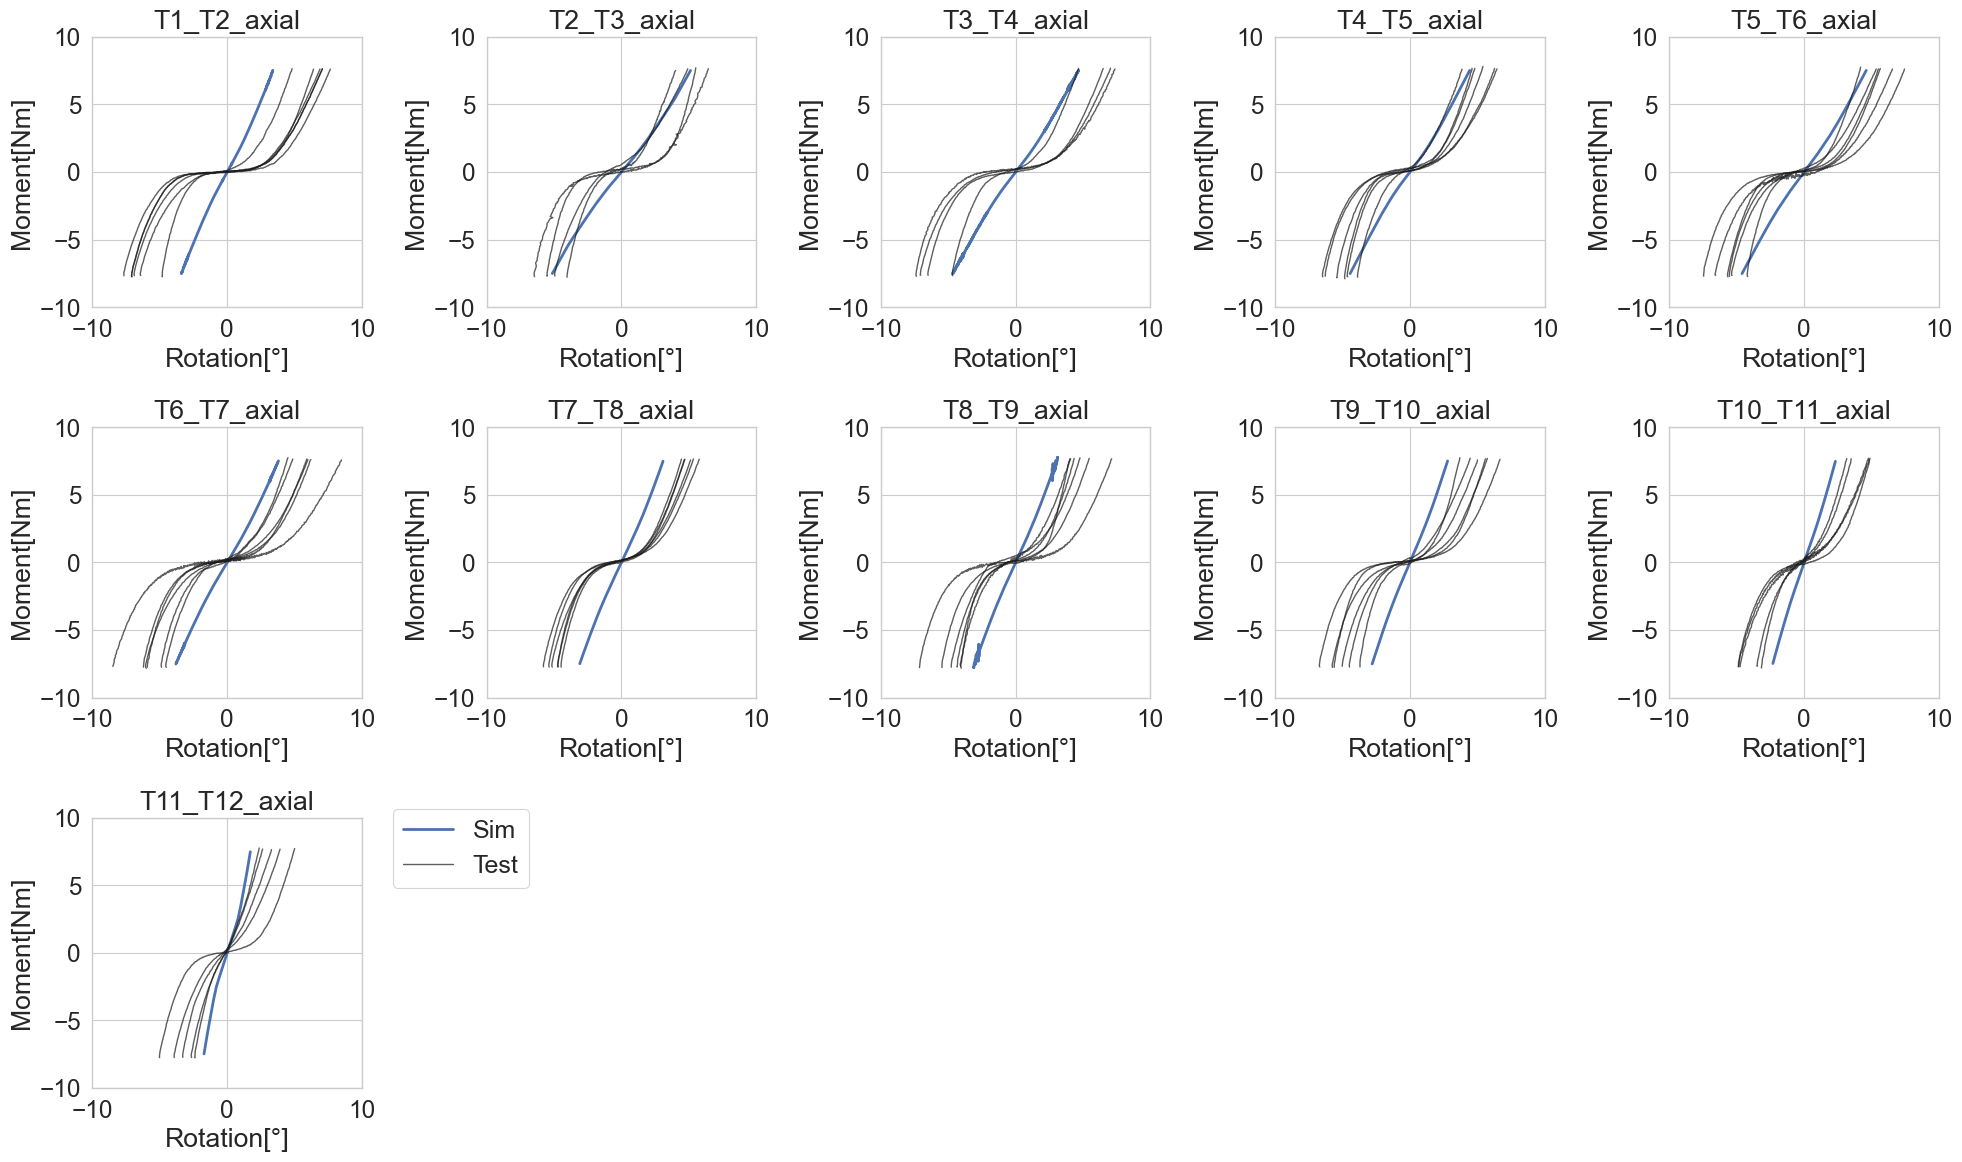

In [15]:
fig_ft, axs = plt.subplots(nrows=3, ncols=5,figsize=(20, 12))
i=0
for ax in axs.flat:
    ax.set_ylabel('Moment[Nm]')
    ax.set_xlabel('Rotation[°]');
    if i > 10:
        break;
    ax.set_title(Sim_Tests[i])
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    Sim_plot, = ax.plot(-sim_output[Sim_Tests[i]].Upper.Pot_angle_non_filter_z.Angle.iloc[0:max_index_[Sim_Tests[i]]]*57.2958,sim_output[Sim_Tests[i]].Lower.Pot_Moment_non_filter_z.moment.iloc[0:max_index_[Sim_Tests[i]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2,label = 'Sim')
    ax.plot(sim_output[Sim_Tests[i]].Upper.Pot_angle_non_filter_z.Angle.iloc[0:max_index_[Sim_Tests[i]]]*57.2958,-sim_output[Sim_Tests[i]].Lower.Pot_Moment_non_filter_z.moment.iloc[0:max_index_[Sim_Tests[i]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2)
    for j in stiff_axial[Exp_test[i]][0]:
        test_plot, = ax.plot(stiff_axial[Exp_test[i]][0][str(j)],stiff_axial[Exp_test[i]][1][str(j)],linestyle = '-', color = 'k', alpha =  0.7, linewidth = 1,label = 'Test')
    i=i+1
fig_ft.delaxes(axs[2,1])
fig_ft.delaxes(axs[2,2])
fig_ft.delaxes(axs[2,3])
fig_ft.delaxes(axs[2,4])
fig_ft.legend([Sim_plot,test_plot],['Sim','Test'],bbox_to_anchor=(0.28,0.32),fontsize=18);
fig_ft.tight_layout()
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

### Flexion/Extension Moment

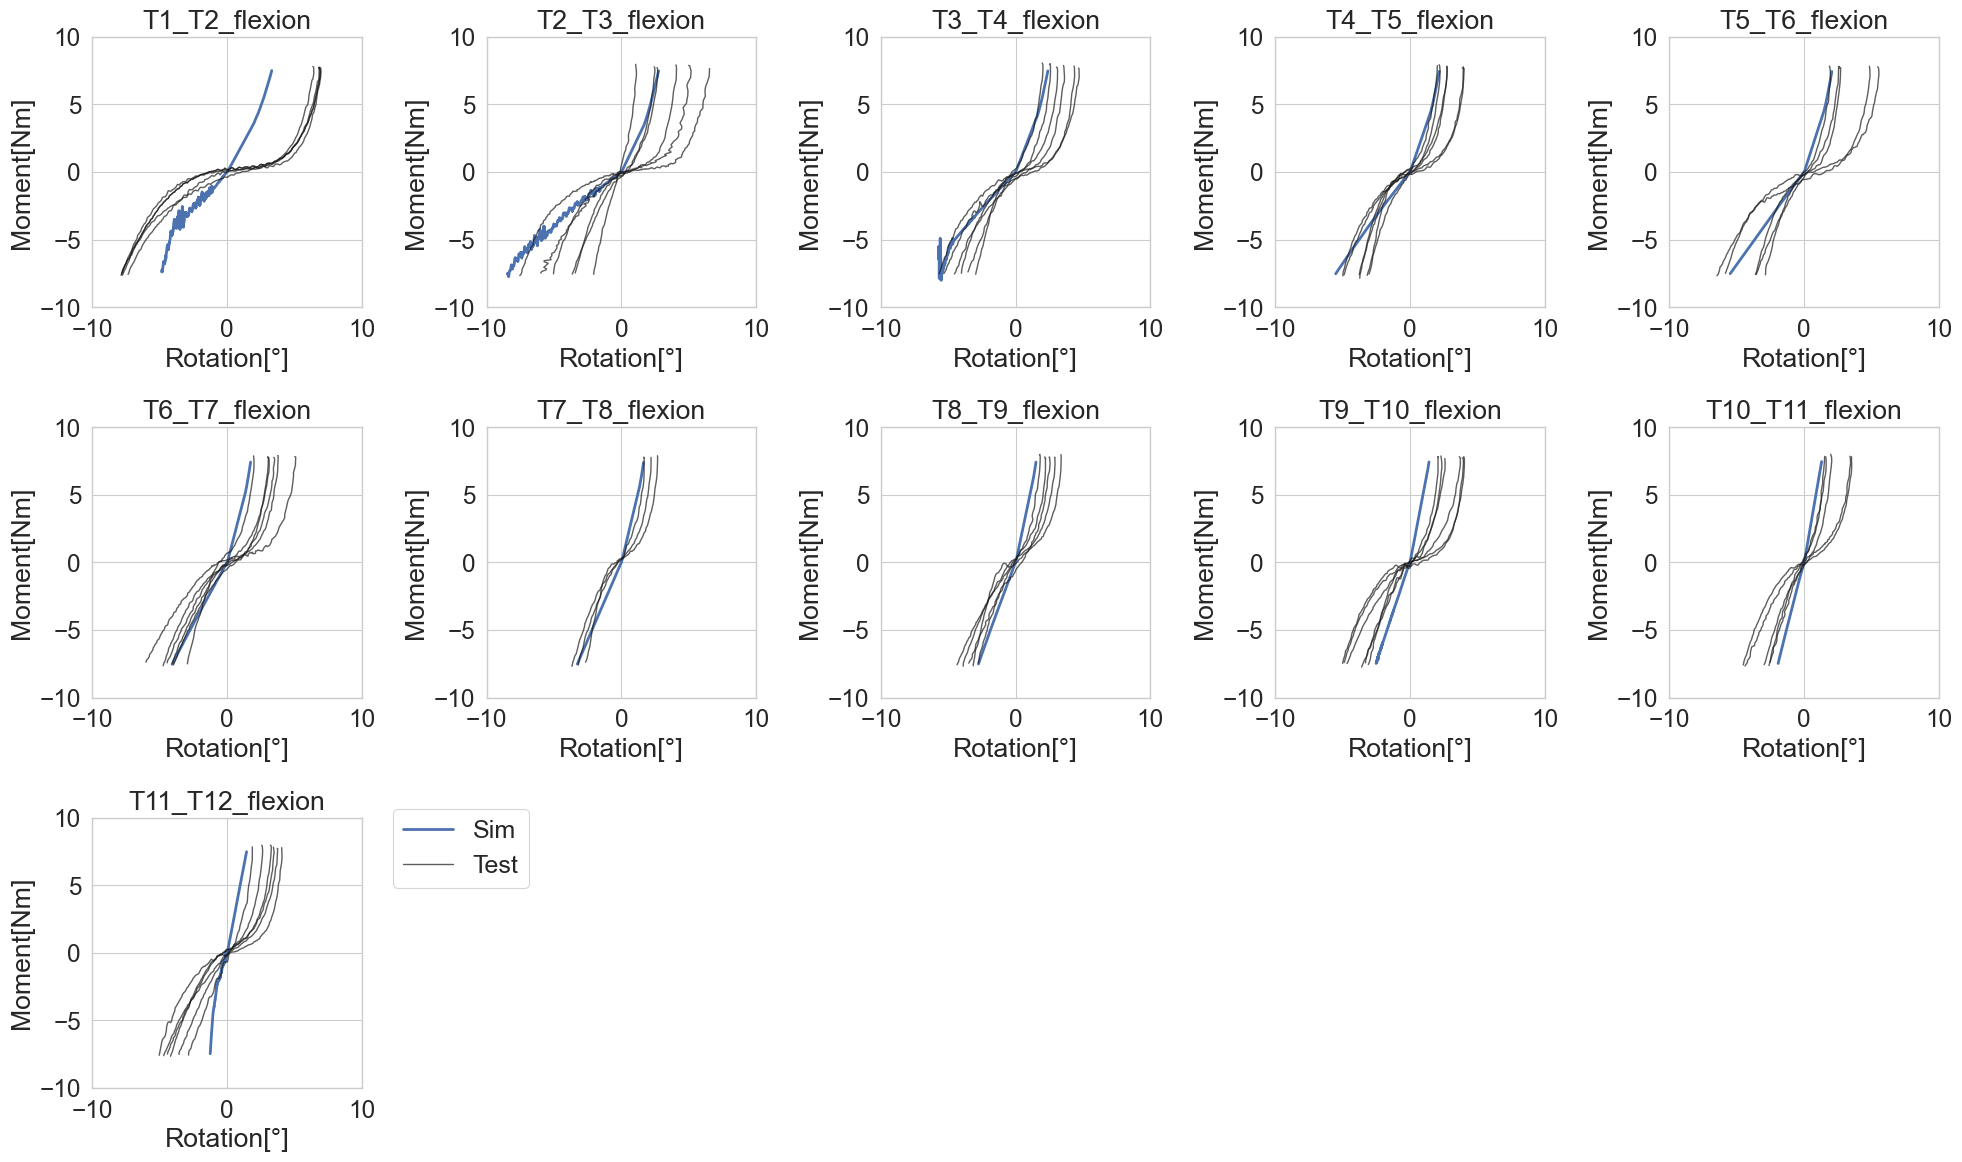

In [16]:
fig_ft, axs = plt.subplots(nrows=3, ncols=5,figsize=(20, 12))
i = 11
ii = 0
for ax in axs.flat:
    ax.set_ylabel('Moment[Nm]')
    ax.set_xlabel('Rotation[°]');
    if i > 21:
        break;
    ax.set_title(Sim_Tests[i])
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    Sim_plot, = ax.plot(sim_output[Sim_Tests[i]].Upper.Pot_angle_non_filter_y.Angle.iloc[0:max_index_[Sim_Tests[i]]]*57.2958,-sim_output[Sim_Tests[i]].Lower.Pot_Moment_non_filter_y.moment.iloc[0:max_index_[Sim_Tests[i]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2)
    ax.plot(sim_output[Sim_Tests[i+11]].Upper.Pot_angle_non_filter_y.Angle.iloc[0:max_index_[Sim_Tests[i+11]]]*57.2958,-sim_output[Sim_Tests[i+11]].Lower.Pot_Moment_non_filter_y.moment.iloc[0:max_index_[Sim_Tests[i+11]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2)
    for j in stiff_flexion[Exp_test[ii]][0]:
        test_plot,=ax.plot(stiff_flexion[Exp_test[ii]][0][str(j)],stiff_flexion[Exp_test[ii]][1][str(j)],linestyle = '-', color = 'k', alpha =  0.7, linewidth = 1)
    i=i+1
    ii = ii + 1
fig_ft.delaxes(axs[2,1])
fig_ft.delaxes(axs[2,2])
fig_ft.delaxes(axs[2,3])
fig_ft.delaxes(axs[2,4])
fig_ft.legend([Sim_plot,test_plot],['Sim','Test'],bbox_to_anchor=(0.28,0.32),fontsize=18);
fig_ft.tight_layout()
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

### Lateral Moment

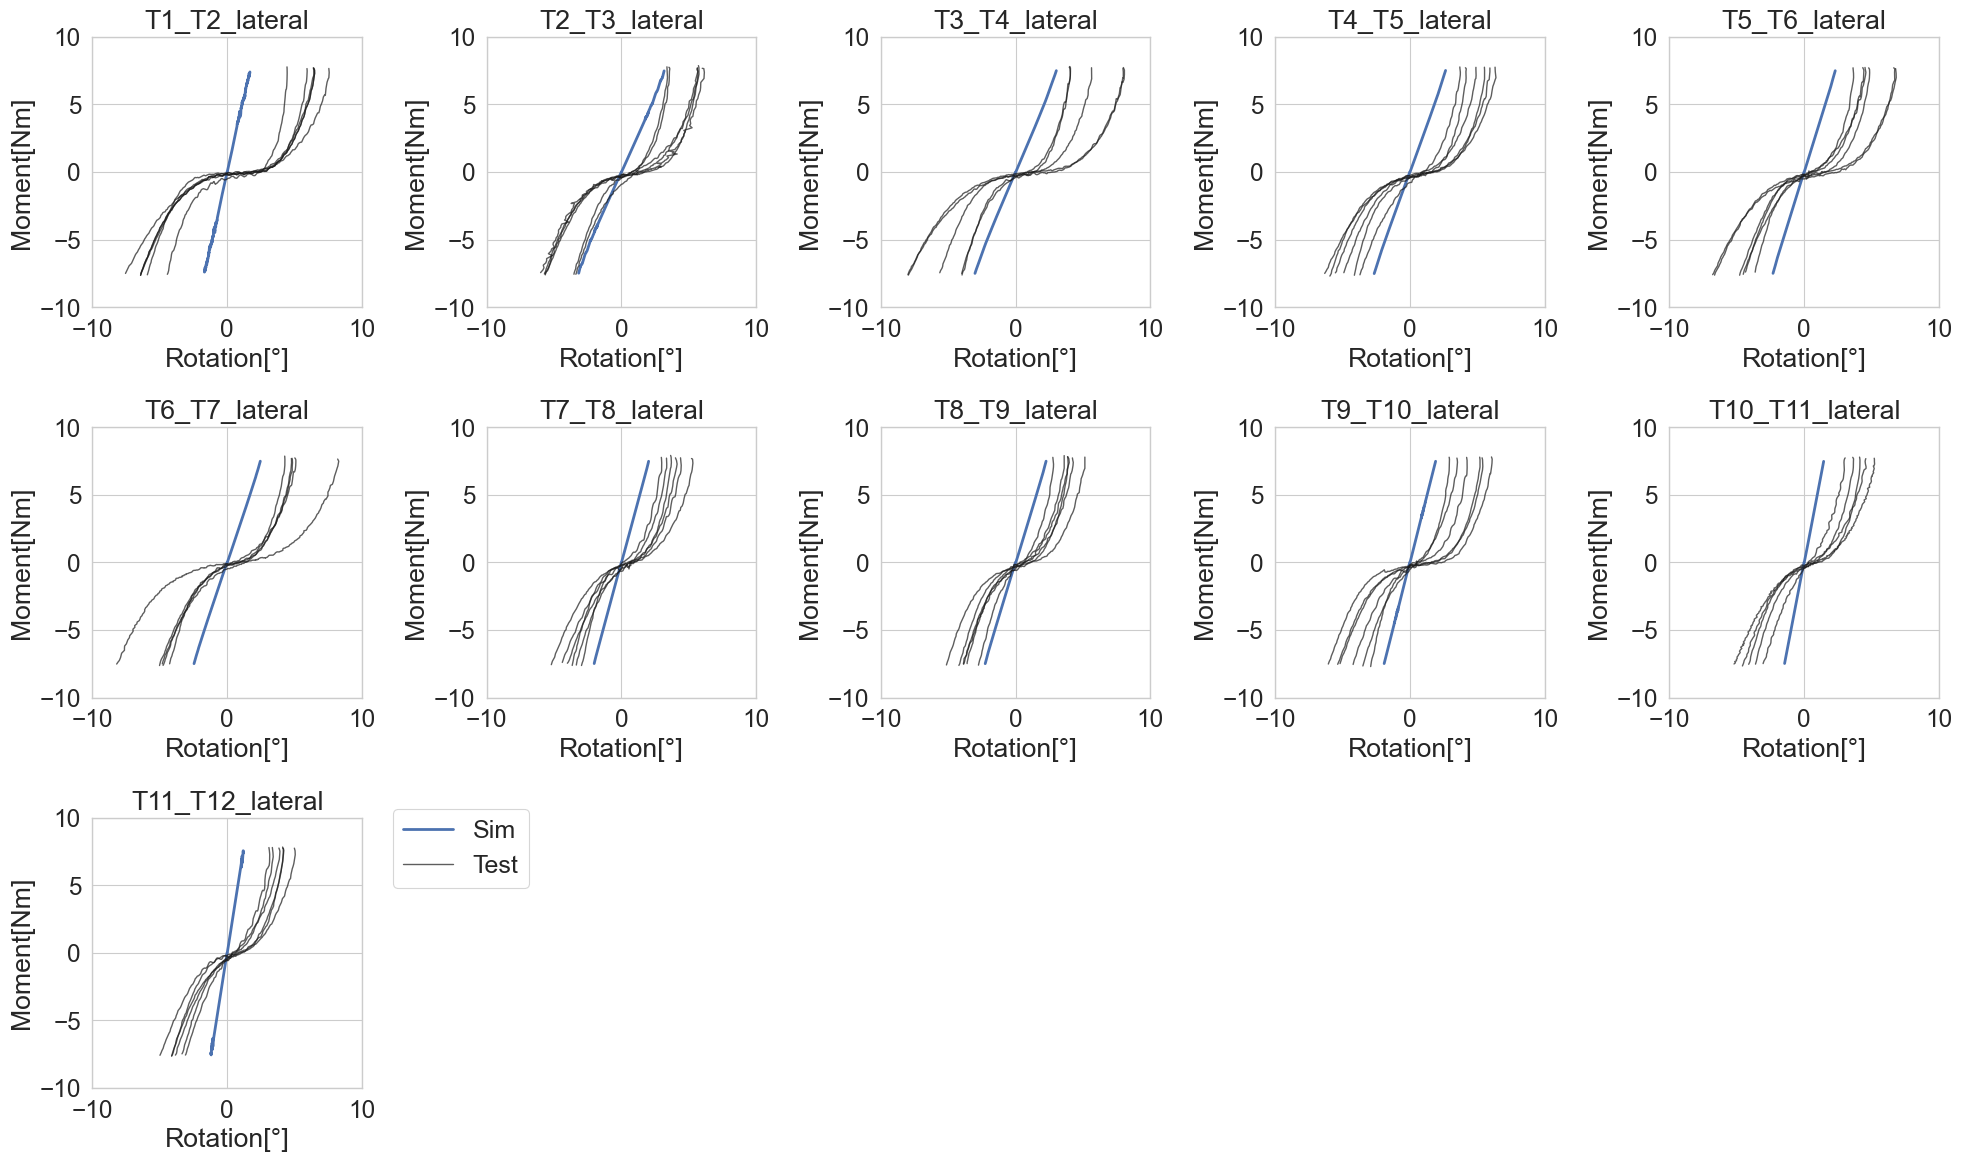

In [17]:
fig_ft, axs = plt.subplots(nrows=3, ncols=5,figsize=(20, 12))
ii = 0
i = 33
for ax in axs.flat:
    ax.set_ylabel('Moment[Nm]')
    ax.set_xlabel('Rotation[°]');
    if i > 43:
        break;
    ax.set_title(Sim_Tests[i])
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    Sim_plot, = ax.plot(sim_output[Sim_Tests[i]].Upper.Pot_angle_non_filter_x.Angle.iloc[0:max_index_[Sim_Tests[i]]]*57.2958,-sim_output[Sim_Tests[i]].Lower.Pot_Moment_non_filter_x.moment.iloc[0:max_index_[Sim_Tests[i]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2)
    ax.plot(-sim_output[Sim_Tests[i]].Upper.Pot_angle_non_filter_x.Angle.iloc[0:max_index_[Sim_Tests[i]]]*57.2958,sim_output[Sim_Tests[i]].Lower.Pot_Moment_non_filter_x.moment.iloc[0:max_index_[Sim_Tests[i]]],linestyle ='-', color = 'b',alpha =1, linewidth = 2)
    for j in stiff_lateral[Exp_test[ii]][0]:
        test_plot, = ax.plot(stiff_lateral[Exp_test[ii]][0][str(j)],stiff_lateral[Exp_test[ii]][1][str(j)],linestyle = '-', color = 'k', alpha =  0.7, linewidth = 1)
    i=i+1
    ii = ii + 1
fig_ft.delaxes(axs[2,1])
fig_ft.delaxes(axs[2,2])
fig_ft.delaxes(axs[2,3])
fig_ft.delaxes(axs[2,4])
fig_ft.legend([Sim_plot,test_plot],['Sim','Test'],bbox_to_anchor=(0.28,0.32),fontsize=18);
fig_ft.tight_layout()
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")